In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [40]:
data = pd.read_csv('hair_loss.csv')
X = data.drop('hair_fall', axis=1)
y = data.hair_fall



Interaktionsterm: total_protein * stress_level
p-Wert: 0.0241
                            OLS Regression Results                            
Dep. Variable:              hair_fall   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.281
Date:                Tue, 09 Jan 2024   Prob (F-statistic):             0.0771
Time:                        23:21:23   Log-Likelihood:            -1.9557e+05
No. Observations:              100000   AIC:                         3.912e+05
Df Residuals:                   99996   BIC:                         3.912e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

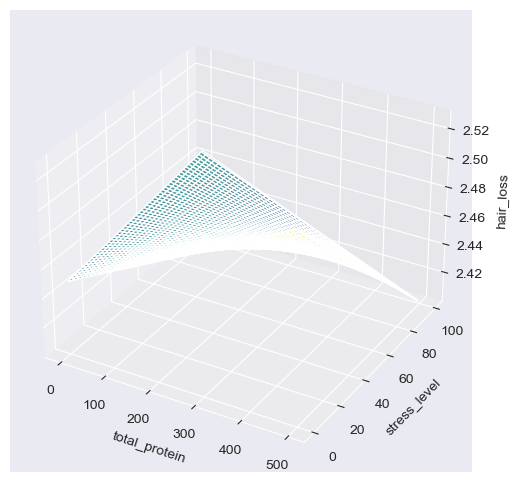


Interaktionsterm: manganese * liver_data
p-Wert: 0.0626
                            OLS Regression Results                            
Dep. Variable:              hair_fall   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.585
Date:                Tue, 09 Jan 2024   Prob (F-statistic):              0.191
Time:                        23:21:26   Log-Likelihood:            -1.9558e+05
No. Observations:              100000   AIC:                         3.912e+05
Df Residuals:                   99996   BIC:                         3.912e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

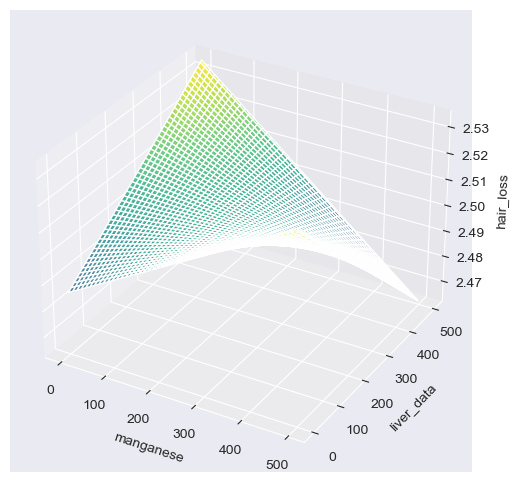


Interaktionsterm: stress_level * liver_data
p-Wert: 0.0986
                            OLS Regression Results                            
Dep. Variable:              hair_fall   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.740
Date:                Tue, 09 Jan 2024   Prob (F-statistic):              0.156
Time:                        23:21:28   Log-Likelihood:            -1.9558e+05
No. Observations:              100000   AIC:                         3.912e+05
Df Residuals:                   99996   BIC:                         3.912e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

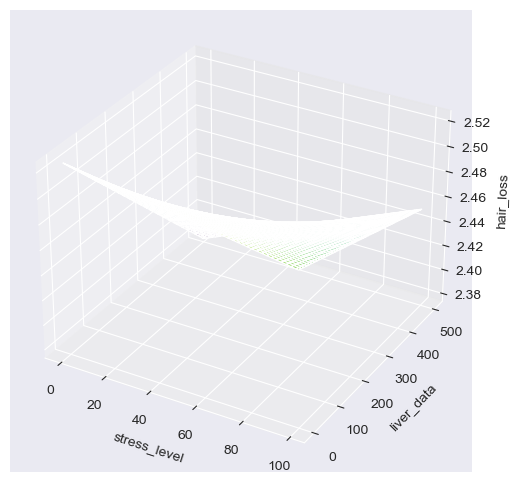

In [41]:
from statsmodels.formula.api import ols
from itertools import combinations
from mpl_toolkits.mplot3d import Axes3D
X_int = pd.DataFrame()

dependent_var = 'hair_loss'
independent_vars = X.columns

# Iteration über alle Kombinationen von unabhängigen Variablen
for var_combination in combinations(independent_vars, 2):
    formula = f'{data.columns[-1]} ~ {var_combination[0]} * {var_combination[1]}'
    model = ols(formula, data=data).fit()
    p_value = model.pvalues[3]
    if p_value < 0.1:
        print(f"\nInteraktionsterm: {var_combination[0]} * {var_combination[1]}")
        print(f"p-Wert: {p_value:.4f}")
        print(model.summary())
        # Erstellen der Spaltennamen für den Interaktionsterm
        interaction_col_name = f"{var_combination[0]}_{var_combination[1]}_interaction"

        # Hinzufügen des Interaktionsterms als neue Spalte
        X_int[interaction_col_name] = X[var_combination[0]] * X[var_combination[1]]

        # Erstelle einen 3D-Plot für den Interaktionsterm
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')

        # Erstelle ein Gitter für x1 und x2
        x1_range = np.linspace(X[var_combination[0]].min(), X[var_combination[0]].max(), 100)
        x2_range = np.linspace(X[var_combination[1]].min(), X[var_combination[1]].max(), 100)
        x1_values, x2_values = np.meshgrid(x1_range, x2_range)

        # Berechne die vorhergesagten y-Werte für jeden Gitterpunkt
        predicted_y = model.params['Intercept'] + model.params[var_combination[0]] * x1_values + model.params[var_combination[0]] * x2_values + model.params[f'{var_combination[0]}:{var_combination[1]}'] * x1_values * x2_values

        # Plote den 3D-Plot
        ax.plot_surface(x1_values, x2_values, predicted_y, cmap='viridis', alpha=0.8)
        ax.set_xlabel(var_combination[0])
        ax.set_ylabel(var_combination[1])
        ax.set_zlabel('hair_loss')
        # ax.set_zlim(0, 5)
        plt.savefig(f'interaction_plot/{var_combination[0]}_{var_combination[1]}_interaction')
        plt.show()

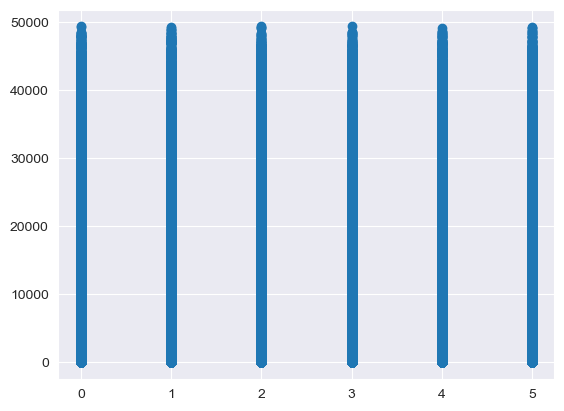

In [42]:
plt.scatter(x=y,y=X_int['total_protein_stress_level_interaction'])

In [43]:
from statsmodels.formula.api import ols

dependent_vars = X.columns

for i in range(len(dependent_vars)):
    for j in range(i+1, len(dependent_vars)):
        # Erstellen der Formel für die Regression mit Interaktionsterm
        formula = f'{data.columns[-1]} ~ {dependent_vars[i]} * {dependent_vars[j]}'

        # Regression mit Interaktionsterm
        model = ols(formula, data=data).fit()

        # Ausgabe des p-Werts für den Interaktionsterm
        p_value = model.pvalues[3]
        if p_value < 0.1:
            print(f"\nInteraktionsterm: {dependent_vars[i]} * {dependent_vars[j]}")
            print(f"p-Wert: {p_value:.4f}")


Interaktionsterm: total_protein * stress_level
p-Wert: 0.0241

Interaktionsterm: manganese * liver_data
p-Wert: 0.0626

Interaktionsterm: stress_level * liver_data
p-Wert: 0.0986


In [44]:
X_int = pd.concat([X, X_int], axis=1)
X_int

,total_protein,total_keratine,hair_texture,vitamin,manganese,iron,calcium,body_water_content,stress_level,liver_data,total_protein_stress_level_interaction,manganese_liver_data_interaction,stress_level_liver_data_interaction
0,312,100,14,249,87,55,333,44,41,368,12792,32016,15088
1,52,207,3,425,387,1,182,26,65,41,3380,15867,2665
2,170,197,11,140,199,91,414,30,54,90,9180,17910,4860
3,256,334,19,358,120,3,35,48,45,65,11520,7800,2925
4,309,185,58,207,329,301,345,23,90,346,27810,113834,31140
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,440,20,63,209,473,260,12,86,7,281,3080,132913,1967
99996,311,233,37,352,194,159,391,57,76,30,23636,5820,2280
99997,27,210,10,185,376,278,96,40,49,110,1323,41360,5390
99998,450,18,35,250,287,157,81,31,2,156,900,44772,312


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_int, y, test_size=0.3, random_state=42)

In [46]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [47]:

from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.17


In [48]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[915, 858, 912, 828, 724, 799],
       [911, 904, 868, 767, 790, 784],
       [907, 848, 883, 770, 719, 799],
       [926, 857, 888, 783, 722, 817],
       [926, 849, 896, 762, 770, 809],
       [914, 868, 862, 806, 748, 811]])

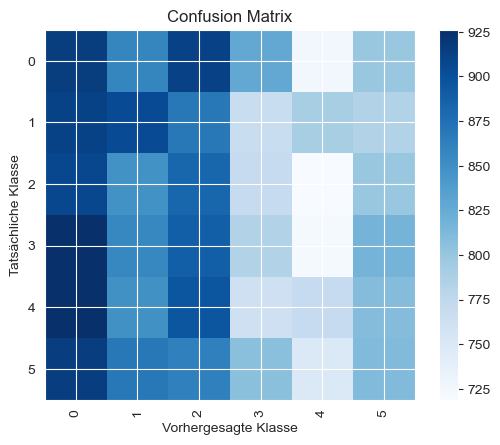

In [49]:
classes = np.unique(y_train)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xticks(rotation='vertical')

plt.xlabel('Vorhergesagte Klasse')
plt.ylabel('Tatsächliche Klasse')
plt.show()

In [50]:
classification_report_result = classification_report(y_test, y_pred)
print(classification_report_result)

              precision    recall  f1-score   support

           0       0.17      0.18      0.17      5036
           1       0.17      0.18      0.18      5024
           2       0.17      0.18      0.17      4926
           3       0.17      0.16      0.16      4993
           4       0.17      0.15      0.16      5012
           5       0.17      0.16      0.17      5009

    accuracy                           0.17     30000
   macro avg       0.17      0.17      0.17     30000
weighted avg       0.17      0.17      0.17     30000

